In [1]:
conda install -c conda-forge gensim

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\15145\anaconda3

  added / updated specs:
    - gensim


The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.11.0-py38haa95532_0 --> conda-forge::conda-4.11.0-py38haa244fe_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda update -n base -c defaults conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\15145\anaconda3

  added / updated specs:
    - conda


The following packages will be REMOVED:

  python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.11.0-py38haa244f~ --> pkgs/main::conda-4.11.0-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [3]:
import gensim.downloader
#show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

C:\Users\15145\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
google_300=gensim.downloader.load('word2vec-google-news-300')#google 300 words embedding


In [5]:
import csv
with open('synonyms.csv','r') as synonyms_file:
    read=csv.reader(synonyms_file)
    read_file=list(read)
    
    print(read_file[3][2])

dangerously


In [6]:
from csv import reader

analysis = []
correct = 0
guessed = 0
with open("synonyms.csv", "r") as f:
    read = reader(f)
    reader = list(read)
    for i in range(1,len(reader)):
        max_similarity = 0
        guess = reader[i][2]
        label = "correct"
        if reader[i][0] in google_300 and ( reader[i][2] in google_300 or reader[i][3] in google_300 or reader[i][4] in google_300 or reader[i][5] in google_300):
            label = "correct"
            correct += 1
        else:
            label = "guess"
            guessed += 1
        for j in range(2,len(reader[i])):
            try:
                if max_similarity < google_300.similarity(reader[i][0], reader[i][j]):
                    guess = reader[i][j]
                    max_similarity = google_300.similarity(reader[i][0], reader[i][j])
                    
            except:
                pass
        if (label !="guess" and guess != reader[i][1]):
            label = "wrong"
            correct -= 1
        analysis.append([reader[i][0]+","+reader[i][1]+","+guess+","+label])     
with open("word2vec-google-news-300-details.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(analysis)
 
                                        

In [9]:
corpus_google300 = len(google_300)
accuracy_google300 = correct/(80-guessed)
total_google300 = 80-guessed

row1 = "word2vec-google-news-300"+","+str(corpus_google300)+","+str(correct)+","+str(total_google300)+","+str(accuracy_google300)
with open("00analysis.csv", 'w', newline='') as analysisfile:
     wr = csv.writer(analysisfile)
     wr.writerows([[row1]])
     analysisfile.write('n') 

In [26]:

# task 2.1
wiki_100=gensim.downloader.load('glove-wiki-gigaword-100')# 2 new models form different corpora 
twitter_100=gensim.downloader.load('glove-twitter-100')#but with same embedding size

In [27]:
from csv import reader

analysis = []
correct = 0
guessed = 0
with open("synonyms.csv", "r") as f:
    read = reader(f)
    reader = list(read)
    for i in range(1,len(reader)):
        max_similarity = 0
        guess = reader[i][2]
        label = "correct"
        if reader[i][0] in wiki_100 and ( reader[i][2] in wiki_100 or reader[i][3] in wiki_100 or reader[i][4] in wiki_100 or reader[i][5] in wiki_100):
            label = "correct"
            correct += 1
        else:
            label = "guess"
            guessed += 1
        for j in range(2,len(reader[i])):
            try:
                if max_similarity < wiki_100.similarity(reader[i][0], reader[i][j]):
                    guess = reader[i][j]
                    max_similarity = wiki_100.similarity(reader[i][0], reader[i][j])
                    
            except:
                pass
        if (label !="guess" and guess != reader[i][1]):
            label = "wrong"
            correct -= 1
        analysis.append([reader[i][0]+","+reader[i][1]+","+guess+","+label])     
with open("glove-wiki-gigaword-100-details.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(analysis)


corpus = len(wiki_100)
accuracy = correct/(80-guessed)
total = 80-guessed

row2= "glove-wiki-gigaword-100"+","+str(corpus)+","+str(correct)+","+str(total)+","+str(accuracy)
#with open("00analysis.csv", 'w', newline='') as analysisfile:
    # wr = csv.writer(analysisfile)
     #wr.writerows([[row]])
     
        


In [28]:
from csv import reader

analysis = []
correct = 0
guessed = 0
with open("synonyms.csv", "r") as f:
    read = reader(f)
    reader = list(read)
    for i in range(1,len(reader)):
        max_similarity = 0
        guess = reader[i][2]
        label = "correct"
        if reader[i][0] in twitter_100 and ( reader[i][2] in twitter_100 or reader[i][3] in twitter_100 or reader[i][4] in twitter_100 or reader[i][5] in twitter_100):
            label = "correct"
            correct += 1
        else:
            label = "guess"
            guessed += 1
        for j in range(2,len(reader[i])):
            try:
                if max_similarity < twitter_100.similarity(reader[i][0], reader[i][j]):
                    guess = reader[i][j]
                    max_similarity = twitter_100.similarity(reader[i][0], reader[i][j])
                    
            except:
                pass
        if (label !="guess" and guess != reader[i][1]):
            label = "wrong"
            correct -= 1
        analysis.append([reader[i][0]+","+reader[i][1]+","+guess+","+label])     
with open("glove-twitter-100-details.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(analysis)


corpus = len(twitter_100)
accuracy = correct/(80-guessed)
total = 80-guessed
row3 = "glove-twitter-100"+","+str(corpus)+","+str(correct)+","+str(total)+","+str(accuracy)
#with open("00analysis.csv", 'w', newline='') as analysisfile:
     #wr = csv.writer(analysisfile)
     #wr.writerows([[row]])

In [12]:
# task 2.2  2 new models from the same corpus but different embedding size
twitter_25=gensim.downloader.load('glove-twitter-25')
twitter_50=gensim.downloader.load('glove-twitter-50')

In [29]:
from csv import reader

analysis = []
correct = 0
guessed = 0
with open("synonyms.csv", "r") as f:
    read = reader(f)
    reader = list(read)
    for i in range(1,len(reader)):
        max_similarity = 0
        guess = reader[i][2]
        label = "correct"
        if reader[i][0] in twitter_25 and ( reader[i][2] in twitter_25 or reader[i][3] in twitter_25 or reader[i][4] in twitter_25 or reader[i][5] in twitter_25):
            label = "correct"
            correct += 1
        else:
            label = "guess"
            guessed += 1
        for j in range(2,len(reader[i])):
            try:
                if max_similarity < twitter_25.similarity(reader[i][0], reader[i][j]):
                    guess = reader[i][j]
                    max_similarity = twitter_25.similarity(reader[i][0], reader[i][j])
                    
            except:
                pass
        if (label !="guess" and guess != reader[i][1]):
            label = "wrong"
            correct -= 1
        analysis.append([reader[i][0]+","+reader[i][1]+","+guess+","+label])     
with open("glove-twitter-25-details.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(analysis)
    
    

corpus = len(twitter_25)
accuracy = correct/(80-guessed)
total = 80-guessed
row4 = "glove-twitter-25"+","+str(corpus)+","+str(correct)+","+str(total)+","+str(accuracy)
#with open("00analysis.csv", 'w', newline='') as analysisfile:
     #wr = csv.writer(analysisfile)
     #wr.writerows([[row]])

In [31]:
from csv import reader

analysis = []
correct = 0
guessed = 0
with open("synonyms.csv", "r") as f:
    read = reader(f)
    reader = list(read)
    for i in range(1,len(reader)):
        max_similarity = 0
        guess = reader[i][2]
        label = "correct"
        if reader[i][0] in twitter_50 and ( reader[i][2] in twitter_50 or reader[i][3] in twitter_50 or reader[i][4] in twitter_50 or reader[i][5] in twitter_50):
            label = "correct"
            correct += 1
        else:
            label = "guess"
            guessed += 1
        for j in range(2,len(reader[i])):
            try:
                if max_similarity < twitter_50.similarity(reader[i][0], reader[i][j]):
                    guess = reader[i][j]
                    max_similarity = twitter_50.similarity(reader[i][0], reader[i][j])
                    
            except:
                pass
        if (label !="guess" and guess != reader[i][1]):
            label = "wrong"
            correct -= 1
        analysis.append([reader[i][0]+","+reader[i][1]+","+guess+","+label])     
with open("glove-twitter-50-details.csv", 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     wr.writerows(analysis)
    
    

corpus = len(twitter_50)
accuracy = correct/(80-guessed)
total = 80-guessed
row5 = "glove-twitter-50"+","+str(corpus)+","+str(correct)+","+str(total)+","+str(accuracy)
with open("analysis.csv", 'w', newline='') as analysisfile:
     wr = csv.writer(analysisfile)
     wr.writerows([[row1]])
     wr.writerows([[row2]])
     wr.writerows([[row3]])
     wr.writerows([[row4]])
     wr.writerows([[row5]])

In [36]:
import random
import pandas as pd
data = pd.read_csv('synonyms.csv', sep=",",header=0)
data

,question,answer,0,1,2,3
0,enormously,tremendously,appropriately,uniquely,tremendously,decidedly
1,provisions,stipulations,stipulations,interrelations,jurisdictions,interpretations
2,haphazardly,randomly,dangerously,densely,randomly,linearly
3,prominent,conspicuous,battered,ancient,mysterious,conspicuous
4,zenith,pinnacle,completion,pinnacle,outset,decline
...,...,...,...,...,...,...
75,fashion,manner,ration,fathom,craze,manner
76,marketed,sold,frozen,sold,sweetened,diluted
77,bigger,larger,steadier,closer,larger,better
78,roots,origins,origins,rituals,cure,function


In [37]:
random.seed(0)
L_pred = list()
for row in data.iterrows():
    random_pred = row[1][str(random.randint(1,3))]
    if random_pred == row[1]["answer"]:
        label='correct'
    else:
        label='wrong'
    s = F"{row[1]['question']},{row[1]['answer']},{random_pred},{label}"
    L_pred.append(s)

with open(f"random-baseline-details.csv",'w') as f:
    for pred in L_pred:
        f.write(pred+'\n')
        print(pred)

enormously,tremendously,tremendously,correct
provisions,stipulations,jurisdictions,wrong
haphazardly,randomly,densely,wrong
prominent,conspicuous,mysterious,wrong
zenith,pinnacle,decline,wrong
flawed,imperfect,lustrous,wrong
urgently,desperately,tentatively,wrong
consumed,eaten,eaten,correct
advent,coming,financing,wrong
concisely,succinctly,freely,wrong
salutes,greetings,privileges,wrong
solitary,alone,restless,wrong
hasten,accelerate,accompany,wrong
perseverance,endurance,skill,wrong
fanciful,imaginative,apparent,wrong
showed,demonstrated,published,wrong
constantly,continually,continually,correct
issues,subjects,benefits,wrong
furnish,supply,protect,wrong
costly,expensive,complicated,wrong
recognized,acknowledged,welcomed,wrong
spot,location,location,correct
make,earn,print,wrong
often,frequently,chemically,wrong
easygoing,relaxed,boring,wrong
debate,argument,competition,wrong
narrow,thin,freezing,wrong
arranged,planned,discarded,wrong
infinite,limitless,unusual,wrong
showy,striking,

In [38]:
with open(f"random-baseline-details.csv",'r') as f:
    for line in f.readlines():
        L_pred.append(line.split(','))
        L_pred[-1][-1] = L_pred[-1][-1].rstrip("\n")
C = list(map(lambda x:x[-1],L_pred)).count("correct")
V = list(map(lambda x:x[-1],L_pred)).count("wrong") + C

In [39]:
row6 = "random-baseline"+","+str(C/V)
row7 = "human-gold-standard"+","+str(0.8557)
with open("88analysis.csv", 'w', newline='') as analysisfile:
     wr = csv.writer(analysisfile)
     wr.writerows([[row1]])
     wr.writerows([[row2]])
     wr.writerows([[row3]])
     wr.writerows([[row4]])
     wr.writerows([[row5]])
     wr.writerows([[row6]])
     wr.writerows([[row7]])



In [43]:
import csv  

header = ['name', 'accuracy']
data1 = ['random-baseline', C/V]
data2 = ['human-gold-standard', 0.8557]
data3 = ['word2vec-google-news-300', 0.886]
data4 = ['glove-wiki-gigaword-100', 0.8125]
data5 = ['glove-twitter-100',0.5]
data6= ['glove-twitter-25', 0.461]
data7 = ['glove-twitter-50',0.461 ]


with open('perform.csv', 'w', encoding='UTF8') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    # write the data
    writer.writerow(data1)
    writer.writerow(data2)
    writer.writerow(data3)
    writer.writerow(data4)
    writer.writerow(data5)
    writer.writerow(data6)
    writer.writerow(data7)
    

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
csv_file='perform.csv'
data=pd.read_csv(csv_file)

In [49]:
model=data["name"]
ac=data["accuracy"]
x=[]
y=[]


In [50]:
x=list(model)
y=list(ac)
x
y

[0.2875, 0.8557, 0.886, 0.8125, 0.5, 0.461, 0.461]

<BarContainer object of 7 artists>

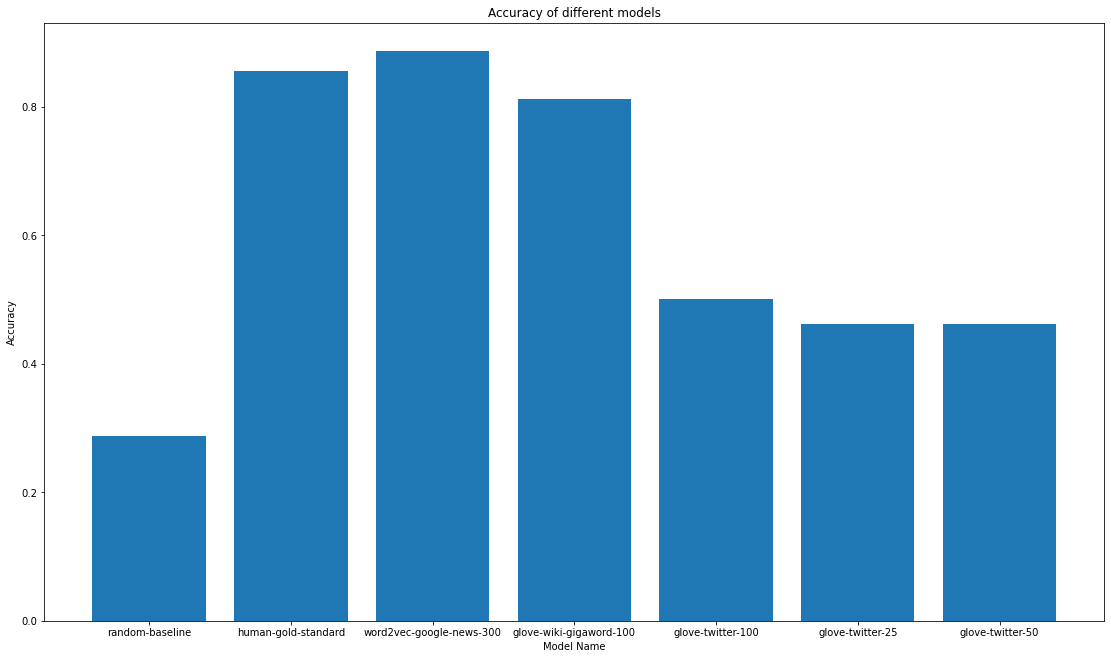

In [57]:
plt.figure(figsize=(19,11))
plt.xlabel('Model Name')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.savefig('performances.pdf')
plt.bar(x,y)